In [8]:
import numpy as np
import qiskit as q
from qiskit import QuantumCircuit
from qiskit import Aer #simulator framework for qiskit
from matplotlib import style
style.use("classic")
%matplotlib inline

In [9]:
nqubits = 3

In [10]:
# apply Hadamard gate to all qubits
def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
        
    return qc

Solutions:
|100>


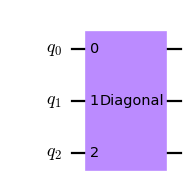

In [11]:
import math
from math import pi
# Oracle circuit

oracle = QuantumCircuit(nqubits, name='oracle$_\omega$')

#theta = pi # theta can be anything (pi chosen arbitrarily)
#oracle.ry(theta/2,1)
#oracle.cx(0,1)
#oracle.ry(-theta/2,1)
#oracle.cx(0,1)


#oracle.h(2)
#oracle.ccx(0,1,2)
#oracle.h(2)

#oracle.ch(0,2)
#oracle.cz(1,2)
#oracle.ch(0,2)

#oracle.ch(0,2)
#oracle.ccx(1,3,2)
#oracle.ch(0,2)

#for qubit in range(nqubits-1):
#    oracle.cz(qubit, nqubits-1)



from qiskit_textbook.problems import grover_problem_oracle
oracle = grover_problem_oracle(nqubits, variant=1, print_solutions = True)


oracle.to_gate()

oracle.draw('mpl')

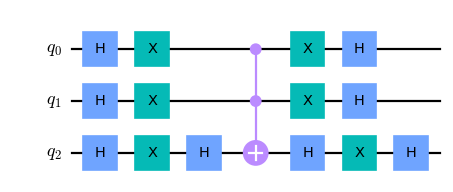

In [12]:
# Diffuser circuit

diffuser = QuantumCircuit(nqubits, name='diffuser$_s$')
for qubit in range(nqubits):
    diffuser.h(qubit)
for qubit in range(nqubits):
    diffuser.x(qubit)
# Do multi-controlled-Z gate
diffuser.h(nqubits-1)
diffuser.mct(list(range(nqubits-1)), nqubits-1)
diffuser.h(nqubits-1)
for qubit in range(nqubits):
    diffuser.x(qubit)
for qubit in range(nqubits):
    diffuser.h(qubit)
diffuser.to_gate()
diffuser.draw('mpl')


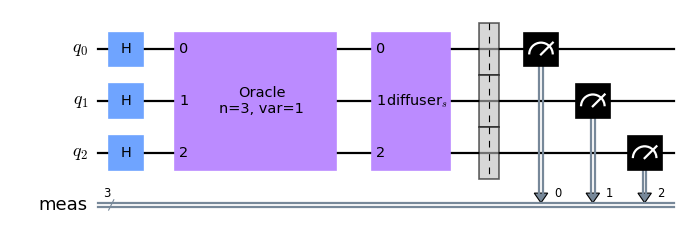

In [13]:
grover_circuit = QuantumCircuit(nqubits)
grover_circuit = initialize_s(grover_circuit, range(nqubits))
grover_circuit.append(oracle, range(nqubits))
grover_circuit.append(diffuser, range(nqubits))
grover_circuit.measure_all()
grover_circuit.draw('mpl')

{'011': 42, '100': 795}


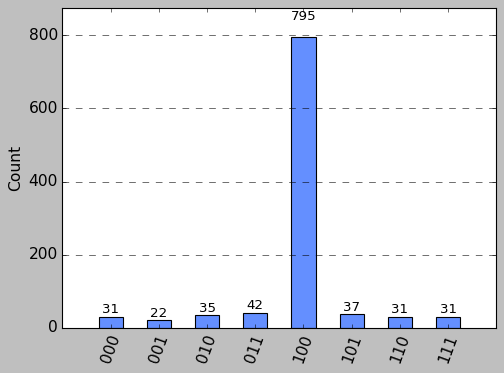

In [14]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend("aer_simulator")

job = q.execute(grover_circuit, backend=backend, shots=1024)
result = job.result()
counts = result.get_counts(grover_circuit)

print(dict((k, v) for k, v in counts.items() if v >= 40))
plot_histogram([counts])

Job ID is chd70qlv6mngo8npmdog
job is being initialized
{'001': 0.0322265625, '101': 0.025390625, '111': 0.0322265625, '011': 0.0283203125, '000': 0.029296875, '100': 0.798828125, '110': 0.0302734375, '010': 0.0234375}


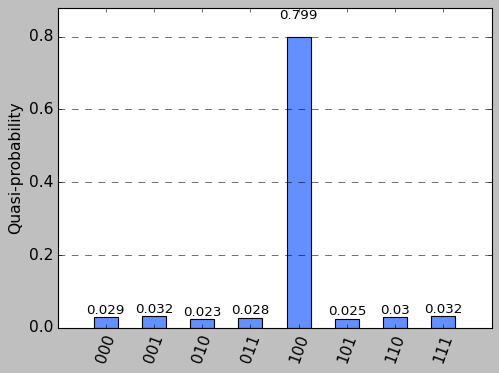

In [15]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler
from qiskit.visualization import plot_histogram

QiskitRuntimeService.save_account(channel="ibm_quantum", token="", overwrite=True)
service = QiskitRuntimeService()

options = Options(optimization_level=1)
options.execution.shots = 1024

with Session(service=service, backend="ibmq_qasm_simulator") as session:
    sampler = Sampler(session=session, options=options)
    job = sampler.run(circuits=grover_circuit)
    print(f"Job ID is {job.job_id()}")
    print(job._status._value_)
    result = job.result()
binary_prob = result.quasi_dists[0].binary_probabilities()

print(dict((k, v) for k, v in binary_prob.items() if v >= 0.02))
plot_histogram([binary_prob])

job_lima ID is chd7hnhmfb1ddb6b18ng
job is being initialized
{'000': 0.06681681119251327, '001': 0.05300228827871481, '010': 0.044248460011246465, '011': 0.06639937057894021, '100': 0.6027869565030274, '101': 0.06784504154794768, '110': 0.04831677257380245, '111': 0.05058429931380773}


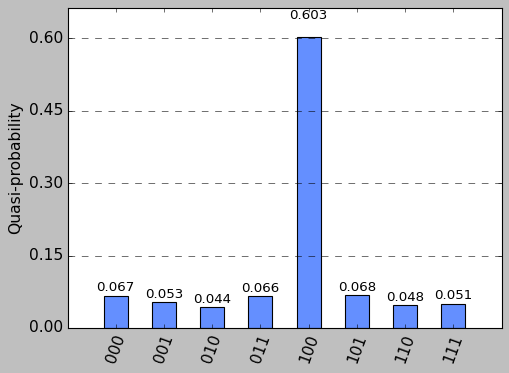

In [18]:
# ibmq_lima 8 QV
with Session(service=service, backend="ibmq_lima") as session:
    sampler_lima = Sampler(session=session, options=options)
    job_lima = sampler_lima.run(circuits=grover_circuit)
    print(f"job_lima ID is {job_lima.job_id()}")
    print(job_lima._status._value_)
    result_lima = job_lima.result()
binary_prob_lima = result_lima.quasi_dists[0].binary_probabilities()

print(dict((k, v) for k, v in binary_prob_lima.items() if v >= 0.02))
plot_histogram([binary_prob_lima])

job_belem ID is chd70s176h9ab2dmh1g0
job is being initialized
{'000': 0.026395032196208597, '001': 0.08409231677928512, '010': 0.03575174255883387, '011': 0.04454754581508302, '100': 0.6228550575978399, '101': 0.06153063212138077, '110': 0.07006080868258405, '111': 0.05476686424878468}


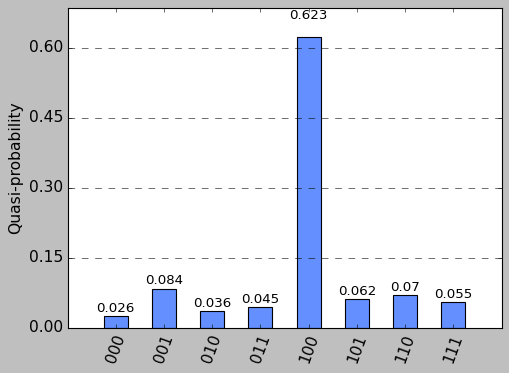

In [16]:
# ibmq_belem 16 QV
with Session(service=service, backend="ibmq_belem") as session:
    sampler_belem = Sampler(session=session, options=options)
    job_belem = sampler_belem.run(circuits=grover_circuit)
    print(f"job_belem ID is {job_belem.job_id()}")
    print(job_belem._status._value_)
    result_belem = job_belem.result()
binary_prob_belem = result_belem.quasi_dists[0].binary_probabilities()

print(dict((k, v) for k, v in binary_prob_belem.items() if v >= 0.02))
plot_histogram([binary_prob_belem])

job_manila ID is chd78d976h9ab2dmm55g
job is being initialized
{'000': 0.05967069777919118, '001': 0.04372613666673348, '010': 0.058548894449195366, '011': 0.05710057592533515, '100': 0.6171962082187225, '101': 0.066873917933122, '110': 0.04732287030852878, '111': 0.04956069871917161}


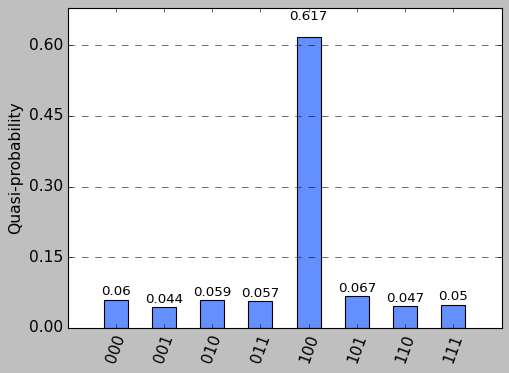

In [17]:
# ibmq_manila 32 QV
with Session(service=service, backend="ibmq_manila") as session:
    sampler_manila = Sampler(session=session, options=options)
    job_manila = sampler_manila.run(circuits=grover_circuit)
    print(f"job_manila ID is {job_manila.job_id()}")
    print(job_manila._status._value_)
    result_manila = job_manila.result()
binary_prob_manila = result_manila.quasi_dists[0].binary_probabilities()

print(dict((k, v) for k, v in binary_prob_manila.items() if v >= 0.02))
plot_histogram([binary_prob_manila])